# Lecture 21 - Soft-Margin SVM

# Soft-Margin Support Vector Machine (SVM): Overlapping Classes

To handle this case, the SVM implementation has a bit of a fudge-factor which "softens" the margin: that is, it allows some of the points to creep into the margin if that allows a better fit. The hardness of the margin is controlled by a tuning parameter, most often known as **slack varible** $\xi_n \geq 0$, $n=1,\dots, N$, with one slack variable for each training data point. For very large $\xi$, the margin is hard, and points cannot lie in it. For smaller $\xi$, the margin is softer, and can grow to encompass some points.

A **slack variable** is defined as $\xi_n = 0$ for data points that are on or inside the correct margin boundary and $\xi_n = |t_n - y(x_n)|$ for other points. Thus a data point that is on the decision boundary $y(x_n) = 0$ will have $\xi_n = 1$, and points with $\xi_n > 1$ will be misclassified. The exact classification constraints are then replaced with

$$t_n y(x_n) \geq 1 - \xi_n, n = 1, \dots, N$$

in which the slack variables are constrained to satisfy $\xi_n \geq 0$. 

* Data points for which $\xi_n = 0$ are correctly classified and are either on the margin or on the correct side of the margin. 
* Points for which $0 < \xi_n \leq 1$ lie inside the margin, but on the correct side of the decision boundary.
* And those data points for which $\xi_n > 1$ lie on the wrong side of the decision boundary and are misclassified.

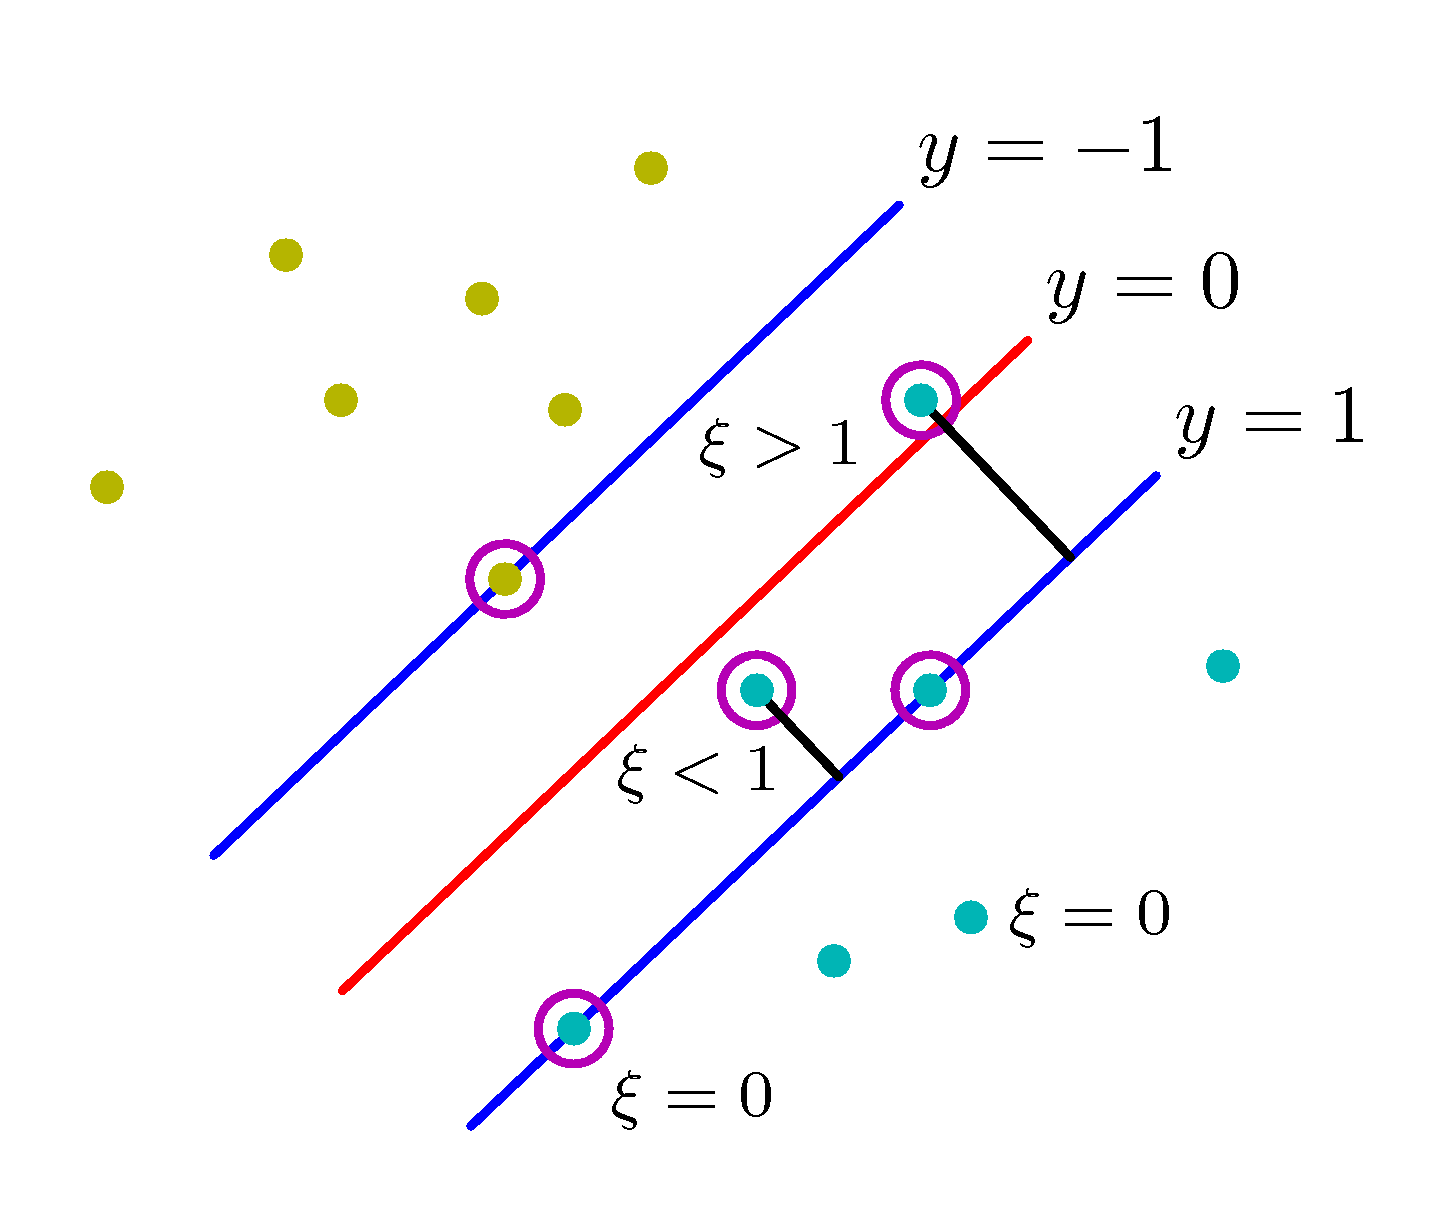

In [1]:
from IPython.display import Image
Image('figures/Figure7.3.png', width=400)
#Source: Bishop textbook

Our goal is now to maximize the margin while softly penalizing points that lie on the wrong side of the margin boundary. We therefore minimize:

\begin{align*}
&\arg_{w,b} \min \frac{1}{2} \Vert w\Vert^2 + C\sum_{n=1}^N \xi_n\\
\text{subject to    } &t_n y(x_n) \geq 1 - \xi_n, n = 1, \dots, N\\
\text{and    } &\xi_n \geq 0, n = 1, \dots, N
\end{align*}

where the parameter $C>0$ controls the trade-off between the slack variable penalty and the margin.

* Because any point that is misclassified has $\xi_n >1$, it follows that $\sum_n \xi_n$ is an upper bound on the number of misclassified points. 
* The parameter $C$ is therefore analogous to (the inverse of) a regularization coefficient because it controls the trade-off between minimizing training errors and controlling model complexity.
* In the limit $C \rightarrow \infty$, we will recover the earlier support vector machine for separable data.

The Lagrangian is given by:

\begin{align*}
L(w,b,a) = \frac{1}{2} \Vert w\Vert^2 + C\sum_{n=1}^N \xi_n - \sum_{n=1}^N a_n \left(t_n y(x_n) - 1 + \xi_n\right) - \sum_{n=1}^N \mu_n\xi_n
\end{align*}

where $\{a_n \geq 0\}_{n=1}^N$ and $\{\mu_n \geq 0\}_{n=1}^N$ are Lagrange multipliers. The corresponding set of 
Karush–Kuhn–Tucker (KKT) conditions are given by

\begin{align*}
a_n & \geq 0 \\
t_n y(x_n) - 1 + \xi_n & \geq 0 \\
a_n(t_n y(x_n) - 1 + \xi_n) & \geq 0 \\
\mu_n & \geq 0 \\
\xi_n & \geq 0\\
\mu_n \xi_n & = 0
\end{align*}

where $n = 1, \dots, N$.

We now optimize for $w$, $b$ and $\{\xi_n\}$:

\begin{align*}
\frac{\partial L}{\partial w} = 0 \Rightarrow & w = \sum_{n=1}^N a_n t_n \phi(x_n) \\
\frac{\partial L}{\partial b} = 0 \Rightarrow & \sum_{n=1}^N a_n t_n = 0 \\
\frac{\partial L}{\partial \xi_n} = 0 \Rightarrow & a_n = C - \mu_n \Rightarrow a_n \leq C
\end{align*}

The dual Lagrangian is then given by:

\begin{align*}
\tilde{L}(a) = \sum_{n=1}^N a_n - \sum_{n=1}^N\sum_{m=1}^N a_n a_m t_n t_m k(x_n, x_m)
\end{align*}

which is identical to the separable case, except that the constraints are somewhat different. We therefore have to minimize $\tilde{L}(a)$ with respect to the dual variables $\{a_n\}$ subject to

\begin{align*}
0 \leq a_n \leq C
\end{align*}

\begin{align*}
\sum_{n=1}^N a_n t_n = 0
\end{align*}

As before, a subset of the data points may have $a_n = 0$, in which case they do not contribute to the predictive model. The remaining data points constitute the support vectors. These have $a_n > 0$ and hence $t_n y(x_n) = 1 - \xi_n$.

* If $a_n < C$, then $\mu_n > 0$, which requires $\xi_n = 0$ and hence such points lie on the margin. 

* Points with $a_n = C$ can lie inside the margin and can either be correctly classified if $\xi_n \leq 1$ or misclassified if $\xi_n >1$.

To determine the parameter $b$, we note that those support vectors for which $0 < a_n < C$ have $\xi_n = 0$ so that $t_n y(x_n) = 1$ and hence will satisfy

\begin{align*}
t_n \left(\sum_{m\in S} a_m t_m k(x_n, x_m) + b\right) = 1
\end{align*}

Again, a numerically stable solution is obtained by averaging to give

\begin{align*}
b = \frac{1}{N_M} \sum_{n\in M}\left(t_n - \sum_{m\in S} a_m t_m k(x_n, x_m)\right)
\end{align*}

where $M$ denotes the set of indices of data points having $0 < a_n < C$.

Although predictions for new inputs are made using only the support vectors, the training phase (i.e., the determination of the parameters $a$ and $b$) makes use of the whole data set, and so it is important to have **efficient algorithms for solving the quadratic programming problem**.

We first note that the objective function $\tilde{L}(a)$ is quadratic and so any local optimum will also be a **global
optimum** provided the constraints define a convex region (which they do as a consequence of being linear).

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

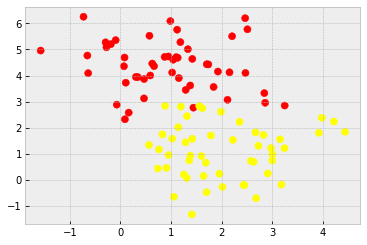

In [3]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

In [4]:
from sklearn.svm import SVC

def plot_svc_decision_function(model, ax=None, plot_support=True):
#source: https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, edgecolors='black',facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

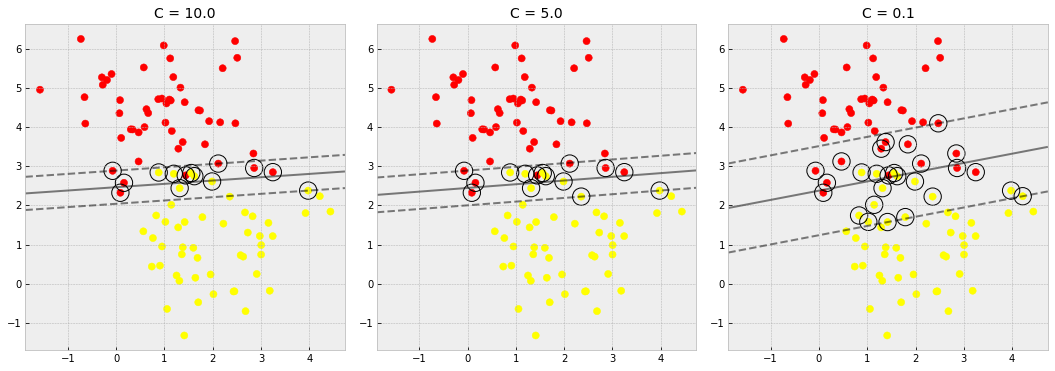

In [5]:
fig, ax = plt.subplots(1, 3, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10, 5, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

The optimal value for the $C$ parameter will depend on your dataset, and should be tuned using cross-validation or a similar procedure.

---

# Example: Face Recognition

As an example of support vector machines in action, let's take a look at the facial recognition problem. We will use the Labeled Faces in the Wild dataset, which consists of several thousand collated photos of various public figures. A fetcher for the dataset is built into Scikit-Learn:

In [6]:
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person=60)

print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


Let's plot a few of these faces to see what we're working with:

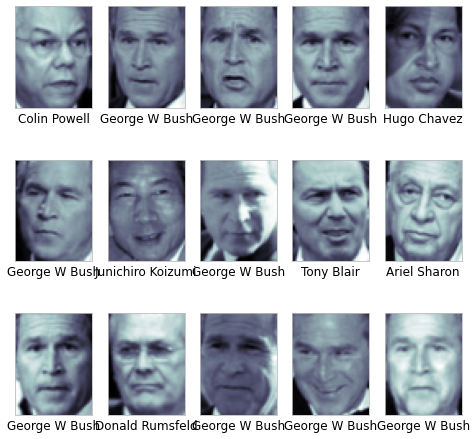

In [7]:
fig, ax = plt.subplots(3, 5, figsize=(8,8))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [8]:
X = faces.data # feature matrix
t = faces.target # labels vector

X.shape, t.shape

((1348, 2914), (1348,))

Each image contains $62\times 47$ or 2,914 pixels. We could proceed by simply using each pixel value as a feature, but often it is more effective to use some sort of pre-processor to extract more meaningful features; here we will use a PCA to extract 150 fundamental components to feed into our support vector machine classifier. We can do this most straightforwardly by packaging the preprocessor and the classifier into a single pipeline:

In [28]:
SVC?

In [9]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

pipe = Pipeline(steps=[('scaler', MinMaxScaler()),
                      ('PCA', PCA(n_components=300)), #(1348-by-300)
                      ('SVM', SVC(kernel='rbf', class_weight='balanced'))])

pipe

Pipeline(steps=[('scaler', MinMaxScaler()), ('PCA', PCA(n_components=300)),
                ('SVM', SVC(class_weight='balanced'))])

For the sake of testing our classifier output, we will split the data into a training and testing set:

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, t_train, t_test = train_test_split(X, t, 
                                                    stratify=t,
                                                    test_size=0.2,
                                                    random_state=0)

X_train.shape, X_test.shape, t_train.shape, t_test.shape

((1078, 2914), (270, 2914), (1078,), (270,))

Finally, we can use a grid search cross-validation to explore combinations of parameters. Here we will adjust ```C``` (which controls the margin hardness) and ```gamma``` (which controls the size of the radial basis function kernel), and determine the best model:

In [11]:
from sklearn.model_selection import GridSearchCV

param_grid = dict(SVM__C=[6, 7, 8, 9, 10],
                  SVM__gamma=[0.005, 0.006, 0.007, 0.008, 0.009, 0.01])

grid = GridSearchCV(pipe, param_grid, cv=5, refit=True, score='accuracy')

grid.fit(X_train, t_train)

print(grid.best_params_)
print(grid.best_score_)

{'SVM__C': 8, 'SVM__gamma': 0.006}
0.8302282515073213


In [12]:
final_model = grid.best_estimator_

In [13]:
from scipy import stats
from sklearn.model_selection import cross_val_score

scores = cross_val_score(final_model, X_train, t_train,
                        scoring='accuracy',
                        cv=5)

confidence = 0.95
print('95% CI Validation set:', stats.t.interval(confidence,
                 len(scores)-1,
                 loc = scores.mean(),
                 scale=scores.std(ddof=1)/np.sqrt(len(scores))))

95% CI Validation set: (0.8107077094761009, 0.8478969416866896)


The optimal values fall toward the middle of our grid; if they fell at the edges, we would want to expand the grid to make sure we have found the true optimum.

Now with this cross-validated model, we can predict the labels for the test data, which the model has not yet seen:

In [14]:
y_train = final_model.predict(X_train)
y_test = final_model.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score

print('Accuracy in Training:', accuracy_score(t_train, y_train)*100,'%\n')
print('Accuracy in Test:', accuracy_score(t_test, y_test)*100,'%')

Accuracy in Training: 99.62894248608535 %

Accuracy in Test: 84.44444444444444 %


Let's take a look at a few of the test images along with their predicted values:

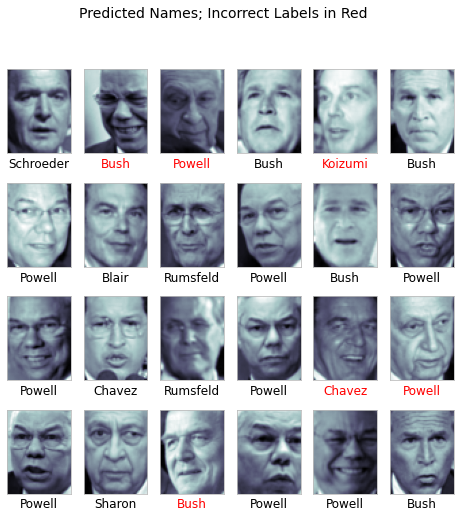

In [16]:
fig, ax = plt.subplots(4, 6, figsize=(8,8))
for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_xlabel(faces.target_names[y_test[i]].split()[-1],
                   color='black' if y_test[i] == t_test[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

Out of this small sample, our optimal estimator mislabeled only a single face (Bush’s face in the bottom row was mislabeled as Blair). We can get a better sense of our estimator's performance using the classification report, which lists summary statistics label by label:

In [17]:
from sklearn.metrics import classification_report

print(classification_report(t_train, y_train, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       1.00      1.00      1.00        61
     Colin Powell       0.99      1.00      0.99       189
  Donald Rumsfeld       0.98      1.00      0.99        97
    George W Bush       1.00      0.99      1.00       424
Gerhard Schroeder       1.00      1.00      1.00        87
      Hugo Chavez       1.00      1.00      1.00        57
Junichiro Koizumi       1.00      1.00      1.00        48
       Tony Blair       1.00      1.00      1.00       115

         accuracy                           1.00      1078
        macro avg       1.00      1.00      1.00      1078
     weighted avg       1.00      1.00      1.00      1078



In [18]:
print(classification_report(t_test, y_test, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.50      0.67        16
     Colin Powell       0.78      0.89      0.83        47
  Donald Rumsfeld       0.94      0.67      0.78        24
    George W Bush       0.86      0.95      0.90       106
Gerhard Schroeder       0.76      0.73      0.74        22
      Hugo Chavez       0.82      1.00      0.90        14
Junichiro Koizumi       0.90      0.75      0.82        12
       Tony Blair       0.88      0.76      0.81        29

         accuracy                           0.84       270
        macro avg       0.87      0.78      0.81       270
     weighted avg       0.85      0.84      0.84       270



We might also display the confusion matrix between these classes:

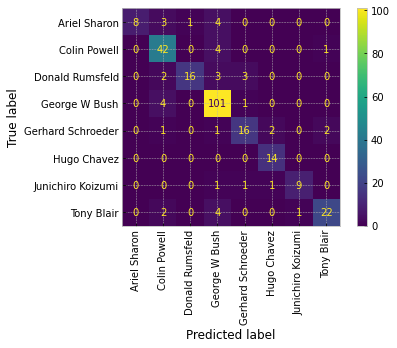

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

cm = confusion_matrix(t_test, y_test)

disp = ConfusionMatrixDisplay(cm, display_labels=faces.target_names)
disp.plot(xticks_rotation='vertical');

This helps us get a sense of which labels are likely to be confused by the classifier.

For a real-world facial recognition task, in which the photos do not come pre-cropped into nice grids, the only difference in the facial classification scheme is the feature selection: you would need to use a more sophisticated algorithm to find the faces, and extract features that are independent of the pixellation. 

* For this kind of application, one good option is to make use of [OpenCV](https://opencv.org/), which, among other things, includes pre-trained implementations of state-of-the-art feature extraction tools for images in general and faces in particular.

## Support Vector Machine Summary

We have seen here a brief intuitive introduction to the principals behind support vector machines. These methods are a powerful classification method for a number of reasons:

Their dependence on relatively few support vectors means that they are very compact models, and take up very little memory.
Once the model is trained, the prediction phase is very fast.
Because they are affected only by points near the margin, they work well with high-dimensional data—even data with more dimensions than samples, which is a challenging regime for other algorithms.
Their integration with kernel methods makes them very versatile, able to adapt to many types of data.
However, SVMs have several disadvantages as well:

The scaling with the number of samples $N$ is $\mathcal{O}[N^3]$ at worst, or $\mathcal{O}[N^2]$ for efficient implementations. For large numbers of training samples, this computational cost can be prohibitive.
The results are strongly dependent on a suitable choice for the softening parameter $C$. This must be carefully chosen via cross-validation, which can be expensive as datasets grow in size.
The results do not have a direct probabilistic interpretation. This can be estimated via an internal cross-validation (see the probability parameter of SVC), but this extra estimation is costly.
With those traits in mind, I generally only turn to SVMs once other simpler, faster, and less tuning-intensive methods have been shown to be insufficient for my needs. Nevertheless, if you have the CPU cycles to commit to training and cross-validating an SVM on your data, the method can lead to excellent results.

# Comparing k-NN, Logistic Regression, LDA, Linear SVM & RBF SVM

In [25]:
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification, make_blobs
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

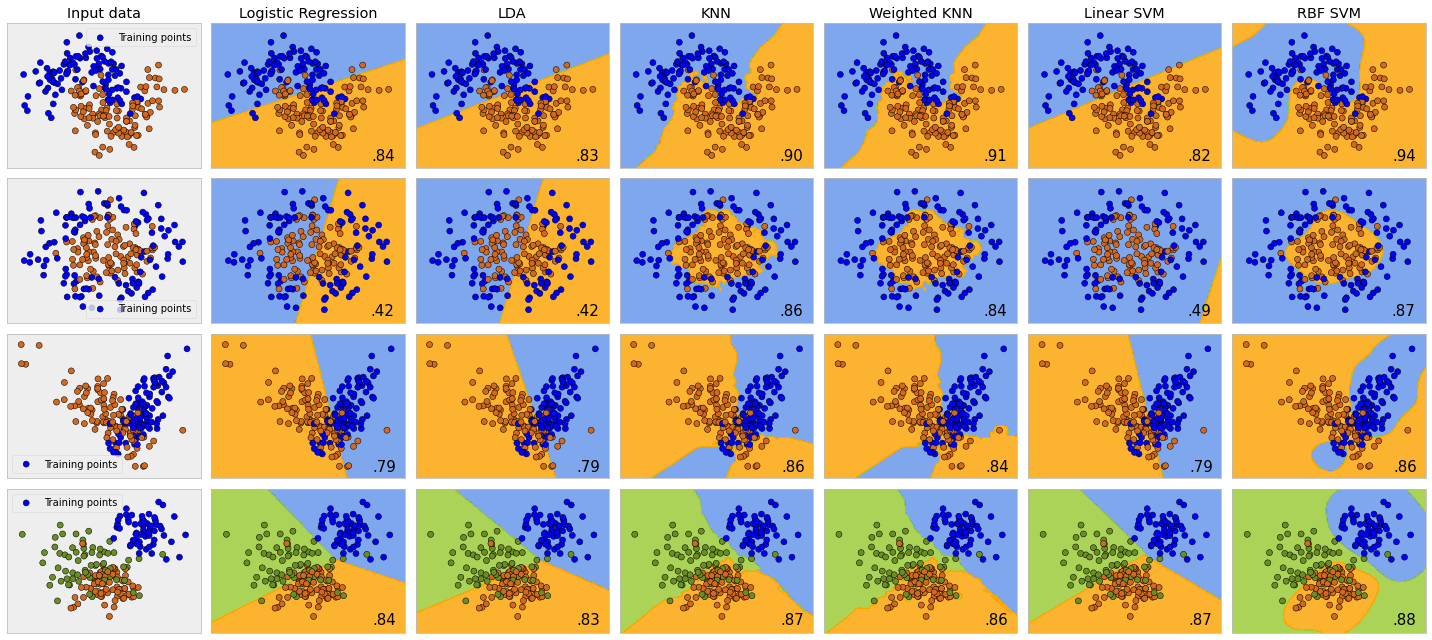

In [21]:
# figure parameters
h = .02  # step size in the mesh
figure = plt.figure(figsize=(20, 9))

# set up classifiers
classifiers = [LogisticRegression(multi_class='multinomial'),
               LinearDiscriminantAnalysis(),
               KNeighborsClassifier(weights='uniform'),\
               KNeighborsClassifier(weights='distance'),\
               SVC(kernel="linear", C=0.025),\
               SVC(gamma=2, C=1)
              ]

names = ["Logistic Regression","LDA", "KNN", "Weighted KNN", "Linear SVM", "RBF SVM"]


# Put together Data Sets
n_samples = 300
X, y = make_classification(n_samples=n_samples, n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 1*rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0,n_samples=n_samples),
            make_circles(noise=0.2, factor=0.5, random_state=1,n_samples=n_samples),
            linearly_separable,
            make_blobs(random_state=1,cluster_std=[3.0,4.0,2.5],n_samples=n_samples)
            ]

i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.3, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = ListedColormap(['cornflowerblue','yellowgreen','orange']) #plt.cm.RdBu
    cm_bright = ListedColormap(['blue','olivedrab','chocolate'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k',label='Training points')
    # Plot the testing points
#     ax.scatter(X_test[:, 0], X_test[:, 1], marker='P', c=y_test, cmap=cm_bright, alpha=0.6,
#                edgecolors='k',label='Test points')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.legend()
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
#         Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
#         ax.scatter(X_test[:, 0], X_test[:, 1], marker='P', c=y_test, cmap=cm_bright,
#                    edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

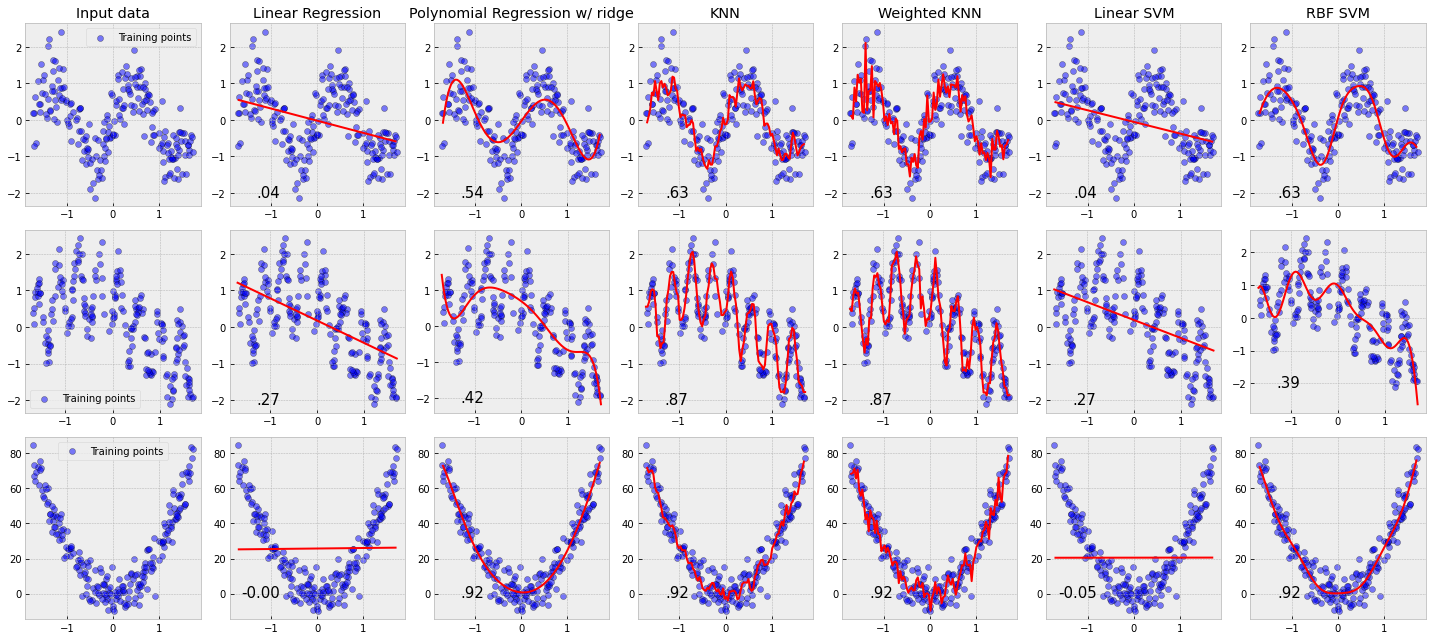

In [31]:
# figure parameters
h = .02  # step size in the mesh
figure = plt.figure(figsize=(20, 9))

# set up regressors
regressors = [LinearRegression(),
              Pipeline([('polynomial_feat', PolynomialFeatures(degree=7)),
                       ('ridge_reg', Ridge())]),
              KNeighborsRegressor(weights='uniform'),\
              KNeighborsRegressor(weights='distance'),\
              SVR(kernel="linear", C=0.025),\
              SVR(gamma=2, C=1_000)
              ]

names = ["Linear Regression", "Polynomial Regression w/ ridge", "KNN", "Weighted KNN", "Linear SVM", "RBF SVM"]

# Put together Data Sets
n_samples = 300
X = np.linspace(0,2,n_samples)
t = np.sin(2*np.pi*X) + np.random.normal(0,0.5,n_samples)
noisy_sine_curve = (X.reshape(-1,1), t)

rng = np.random.RandomState(42)
X = 10 * rng.rand(n_samples)
sigma=0.3
t = np.sin(5 * X) + np.sin(0.5 * X) + sigma * rng.randn(len(X))
fast_and_slow_oscillation = (X.reshape(-1,1),t)

X = np.linspace(0,10,n_samples)
t = 3*(X-5)**2 + 6* np.random.randn(n_samples)
noisy_quadratic=(X.reshape(-1,1),t)

datasets = [noisy_sine_curve, fast_and_slow_oscillation, noisy_quadratic]

i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, t = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, t_train, t_test = train_test_split(X, t, 
                                                        test_size=.3, 
                                                        random_state=42)
    
    # Synthetic data for plotting
    xx = np.linspace(-1.7,1.7,100).reshape(-1,1)
    
    ax = plt.subplot(len(datasets), len(regressors) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    plt.scatter(X_train, t_train, c='blue', alpha=0.5, edgecolors='k',label='Training points')
    # Plot the testing points
#     plt.scatter(X_test, t_test, c='red', alpha=0.5, marker='^', edgecolors='k',label='Test points')
    plt.legend()
    i += 1

    # iterate over regressors
    for name, reg in zip(names, regressors):
        ax = plt.subplot(len(datasets), len(regressors) + 1, i)
        
        # Training regressor
        reg.fit(X_train, t_train)
        
        # Making predictions
        y_train = reg.predict(X_train)
        y_test = reg.predict(X_test)
        
        # r2-score in test
        score = r2_score(t_test, y_test)

        # Plot the predictions
        ax.plot(xx, reg.predict(xx), 'red')
        ax.scatter(X_train, t_train, c='blue', alpha=0.5, edgecolors='k',label='Training points')
        # Plot the testing points
#         ax.scatter(X_test, t_test, c='red', alpha=0.5, marker='^', edgecolors='k',label='Test points')
        
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - 2.5, yy.min() + 0.5, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

---